In [1]:
import pandas as pd 
import numpy as np 
import tensorly as tl
import plotly.express as px
import plotly.io as pio
import os 
import datetime


pio.renderers.default = "notebook_connected"

In [2]:
def read_ticker(ticker) : 
    filename = ticker
    csv = pd.read_csv(filename)
    return csv 


# def calc_momentum(df):
PATH = os.getcwd()
PATH_p2b = os.path.join(PATH,'historical_equities','historical_ptobook.xlsx')
PATH_eq = os.path.join(PATH,'historical_equities', 'historical_prices.xlsx')
prices_eq = pd.read_excel(PATH_eq,index_col='Dates')
ptobook_eq = pd.read_excel(PATH_p2b, index_col='Dates')

def rename_column(df) : 
    ticker_names = list(prices_eq.columns)
    shortened_names = []
    for ticker in ticker_names : 
        shortened_names.append((ticker.split(' ', 1)[0]))
    df.columns = shortened_names
    return df
prices_eq = rename_column(prices_eq)
ptobook_eq = rename_column(ptobook_eq)


In [3]:
booktoprice = pd.DataFrame(1 / ptobook_eq.values, index = ptobook_eq.index, columns = ptobook_eq.columns)

booktoprice 

,AAPL,AMZN,BAC,CVX,DIS,HD,JPM,KO,MA,MSFT,NVDA,PFE,PG,UNH,V,WFC,XOM,LLY,PEP,CSCO
Dates,,,,,,,,,,,,,,,,,,,,
2010-01-29,0.205486,0.094411,1.479290,0.634759,0.652699,0.407747,1.024170,0.198491,0.108047,0.178348,0.308433,0.630159,0.376648,0.623675,0.386668,0.701656,0.363042,0.235466,0.179659,0.322186
2010-02-26,0.192879,0.100001,1.347891,0.633192,0.617360,0.366059,0.950209,0.204253,0.120341,0.175300,0.293006,0.670017,0.366354,0.607829,0.371941,0.729607,0.359855,0.241365,0.171462,0.297557
2010-03-31,0.184071,0.092777,1.183152,0.625978,0.552456,0.353045,0.880127,0.195783,0.115101,0.178126,0.272799,0.685636,0.357526,0.656987,0.357475,0.659674,0.357641,0.250432,0.200228,0.278125
2010-04-30,0.165678,0.091877,1.184413,0.582886,0.516636,0.326126,0.924984,0.201792,0.117866,0.170847,0.318228,0.700869,0.363914,0.708165,0.360646,0.620001,0.353482,0.259383,0.203116,0.284438
2010-05-31,0.168393,0.100402,1.341742,0.642591,0.569509,0.339317,0.995025,0.209842,0.144896,0.202204,0.380474,0.769408,0.370288,0.738389,0.449095,0.715512,0.396212,0.276625,0.210642,0.330743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.027143,0.072388,0.711794,0.694734,0.287894,0.005969,0.527565,0.098269,0.019593,0.071782,0.040898,0.293798,0.133761,0.190934,0.080188,0.909753,0.644828,0.035096,0.076302,0.179824
2021-10-29,0.025639,0.070512,0.632431,0.615612,0.294083,0.002662,0.508311,0.091099,0.020303,0.061024,0.037203,0.308414,0.130777,0.162019,0.084345,0.825287,0.588305,0.031830,0.071018,0.180917
2021-11-30,0.023235,0.067805,0.679486,0.624415,0.343136,0.002470,0.543685,0.097907,0.021631,0.061214,0.029109,0.251067,0.129339,0.167946,0.092180,0.883704,0.633834,0.032692,0.071827,0.184645


## Add momentum to equities and plot it 


In [4]:
N = 12
YEARS = np.arange(2010,2022)
def generate_momentum_data(df) : 
    mom_df = pd.DataFrame()
    returns = ((df.shift(-1) - df)  /  df * 100)
    returns.reset_index(inplace=True)
    returns = returns [:-2] # Delete last two rows
    mom_df = returns.groupby(returns.index // N).sum() #Cumulative return over 12-months
    mom_df.index = YEARS
    
    return mom_df

def generate_val_data(df) : 
    tmp = df.copy(deep=True)
    tmp.reset_index(inplace=True)
    tmp = tmp[:-1]
    val_df = tmp.groupby(tmp.index // N).mean() 
    val_df.index = YEARS
    return val_df

def generate_price_plots(price_df, log = False) :
    if log :  
        fig = px.line(np.log(price_df))
    else : 
        fig = px.line(price_df)
    fig.show()

def generate_momentum_plots(mom_df, str_asset) : 
    fig = px.histogram(mom_df,barmode='group')

    fig.update_layout(
        title = 'Momentum', # adding the title 
        xaxis_title = 'Momentum (%)', # title for x axis 
        yaxis_title = 'Number of occurences', # title for y axis 
        xaxis = dict(           # attribures for x axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
            range = [-50, 160]

        ),
        yaxis = dict(           # attribures for y axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
        ),
    )

    fig.show()


    bins = [-300,0,300]
    binned_mom_df = pd.DataFrame()
    for column in mom_df.columns :
        str = column
        binned_mom_df[str] = pd.cut(mom_df[column],bins,labels = ['Negative', 'Positive'])

    fig = px.histogram(binned_mom_df,barmode = 'group')

    fig.update_xaxes(categoryorder='array', categoryarray= ['Negative', 'Positive'])

    fig.update_layout(
        title = 'Positive or Negative Momentum throughout 2010-2021', # adding the title 
        xaxis_title = 'Positive or Negative', # title for x axis 
        yaxis_title = 'Number of occurences', # title for y axis 
        xaxis = dict(           # attribures for x axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',

        ),
        yaxis = dict(           # attribures for y axis 
            showline = True,
            showgrid = True,
            linecolor = 'black',
        ),
    )
    fig.show()


momentum_eq_df = generate_momentum_data(prices_eq)

# generate_price_plots(prices_eq, log=True)

# generate_momentum_plots(momentum_eq_df, str_asset='Equities')


# generate_price_plots(booktoprice, log=False)

val_eq_df = generate_val_data(ptobook_eq)


## Center the data

In [5]:
import plotly.express as px 

mean_centered_momentum_eq_df = momentum_eq_df - momentum_eq_df.mean()


mean_centered_value_eq_df = val_eq_df - val_eq_df.mean()

In [6]:
from tensorly.decomposition import tucker, parafac, partial_tucker

def parafac_decomp(df, r) : 

    '''
    Input : 
    df : dataframe containing a 2D tensor ready for decomposition

    r : Value of r for the r-rank approximation


    Return  :
    reconstructed_df : Dataframe of the r-rank approximation of the tensor
    error : L1-norm error 
    
    '''
    tensor = df.to_numpy()
    weights, factors = parafac(tensor, rank=r)
    print(f"Rank = {rank}")
    print(f"Number of factors {len(factors)}")
    
    outer_prod= np.zeros(shape = np.shape(tensor))

    A = factors[0]
    B = factors[1]
    individual_ranks = []
    vs_explained = []

    for i in range(rank) :
        a = A[:,i] 
        b = B[:,i]
        outer_prod += np.outer(a,b)
        diff = (abs(df - np.outer(a,b)).values.sum() / (df.values.sum()))
        individual_ranks.append((a,b,diff))

    reconstructed_df = pd.DataFrame(outer_prod,index=df.index,columns=df.columns)
    error = np.abs((reconstructed_df - df).values.sum())
    individual_ranks = sorted(individual_ranks,key=(lambda x : x[2])) #sort by variance
    return individual_ranks, reconstructed_df, error

# rank = 6 
# individual_ranks, r_rank_approxed, error = parafac_decomp(momentum_eq_df,rank)

Shape of the factor 1 (12, 12)
Shape of the factor 2 (20, 5)
Shape of the factor 3 (2, 2)


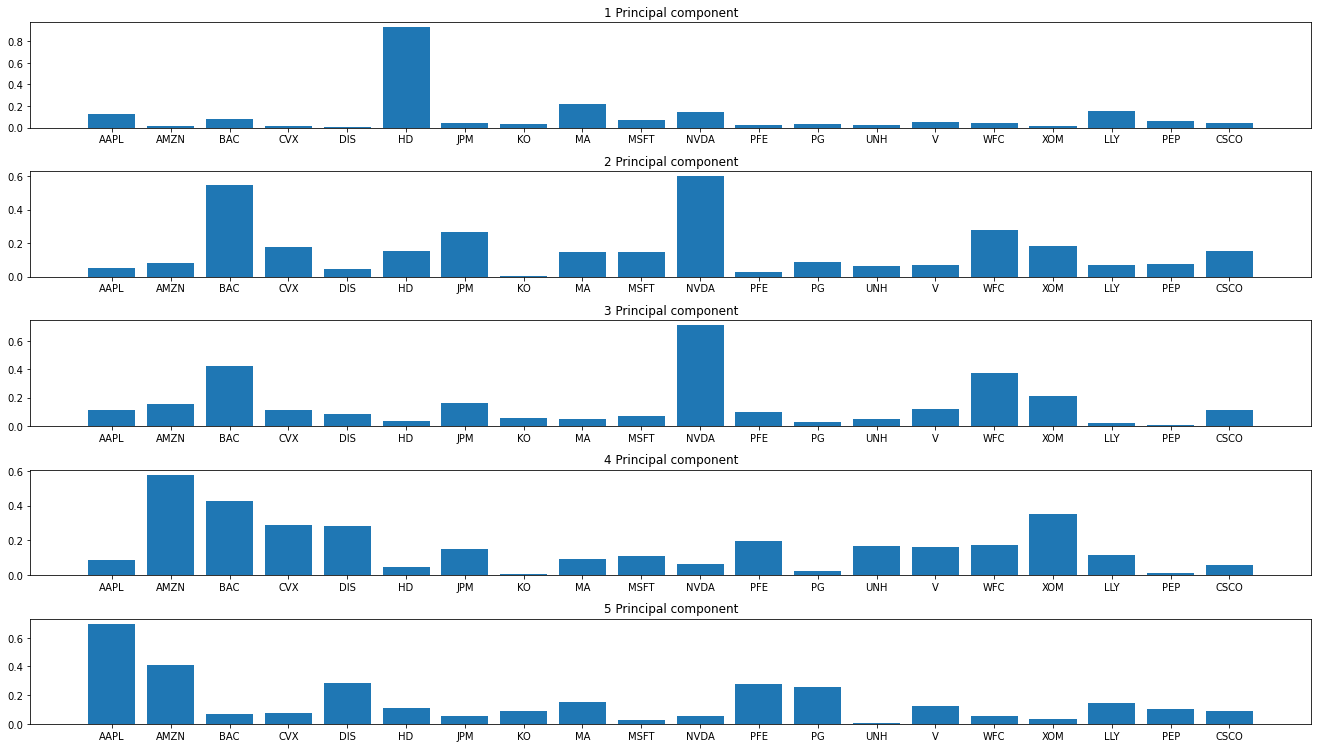

In [8]:
import matplotlib.pyplot as plt
# def variance_explained(df,core,factors,number) :
#     flat_core = core.flatten()
#     eig_vals = flat_core[flat_core!=0]
#     loadings = factors[1]
#     sum_first_n_eigs = sum([abs(eig_vals[num]) for num in np.arange(0,number)])
#     print(f"Variance explained by the first {number} eigenvectors is {sum_first_n_eigs/sum(abs(eig_vals))}   ")
#     print(f"Principal components are \n {pd.DataFrame(factors[0]@core)}")

#     print(f"Loading matrix is : \n {pd.DataFrame(loadings,index=df.columns)}")
#     fig, axes = plt.subplots(number,1)
#     for i in range(number) : 
#         axes[i].bar(df.columns,abs(loadings[:,i]))
#         axes[i].set_title(f'{i+1} Principal component')
#     fig.set_size_inches(18.5,10.5)
#     fig.tight_layout()

def variance_explained(df, core,factors) : 
    PCS = None # Principal componenents
    tmp = tl.tenalg.mode_dot(core,factors[0],mode= 0)
    PCS = tl.tenalg.mode_dot(tmp, factors[2], mode=2)
    number = 5 
    fig, axes = plt.subplots(number,1)
    loadings = factors[1]
    for i in range(number) : 
        axes[i].bar(df.columns,abs(loadings[:,i]))
        axes[i].set_title(f'{i+1} Principal component')
    fig.set_size_inches(18.5,10.5)
    fig.tight_layout()

    # print(PCS.shape)
    # print(factors1.shape)
    


tensor_val = mean_centered_value_eq_df.to_numpy()
tensor_mom = mean_centered_momentum_eq_df.to_numpy()
tensor = np.stack([tensor_val,tensor_mom], axis=2)
core, factors = tucker(tensor, rank = [12,5,2])

# tl.tenalg.mode_dot(new_tensor,factors[0])
# print(new_tensor)

variance_explained(mean_centered_value_eq_df,core,factors)
# print(f"Shape of the new core is {core.shape}")
print(f"Shape of the factor 1 {factors[0].shape}")
print(f"Shape of the factor 2 {factors[1].shape}")
print(f"Shape of the factor 3 {factors[2].shape}")


# mode_0_product = tl.tenalg.mode_dot(core,factors[0],mode=0)
# mode_1_product = tl.tenalg.mode_dot(core,factors[1],mode=1)
# mode_2_product = tl.tenalg.mode_dot(core,factors[2],mode=2)

# print(mode_0_product.shape)
# print(mode_1_product.shape)
# print(mode_2_product.shape)

# variance_explained(mean_centered_momentum_eq_df,core,factors,4)

In [ ]:
# print(pd.DataFrame(factors[0]@core))
# u,s,v = np.linalg.svd(tensor,full_matrices=False)
# print(v)
# print(pd.DataFrame(factors[0]))
# print(pd.DataFrame(u))

# print(u.shape)
# smat = np.diag(s)
# print(smat)
# print(f"{pd.DataFrame(u@smat)}")
